In [33]:
import sys
sys.path.append('../')
from End2End_ML import create_dataset,create_feat_dataset
from End2End_ML import config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [16]:
raw_data = create_dataset.load_raw_data()

create_dataset.clean_Data(raw_data)

clean_df = create_dataset.load_clean_data()
#create_dataset.clean_Data(create_dataset.load_raw_data())
clean_df.head(2)

c:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\End2End_ML


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1


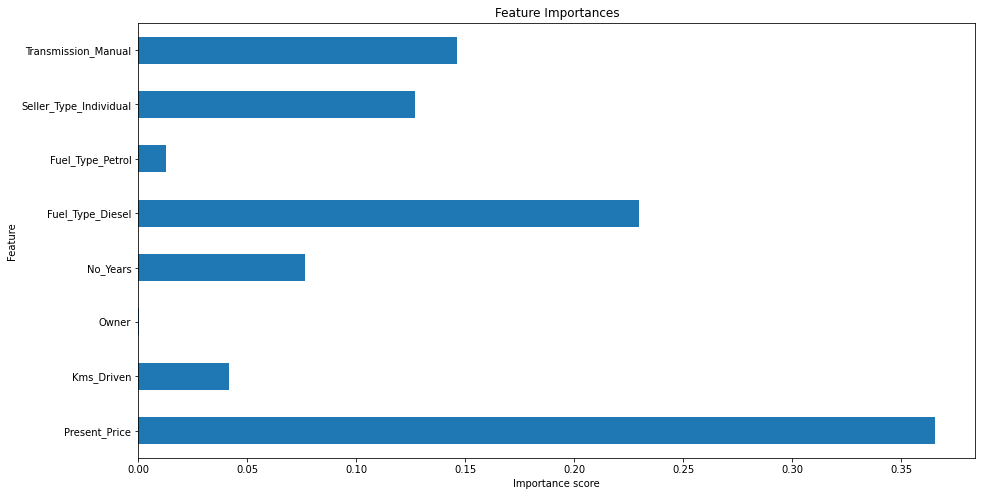

In [17]:
#%matplotlib-agg
X,Y = create_feat_dataset.create_feat_dataset(clean_df)
X.head(2)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=config['random_seed'])
X_train.shape

(240, 8)

In [44]:
regressor=RandomForestRegressor(n_estimators=2000, max_depth=10)

In [42]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=3, n_estimators=2000)

In [43]:
preds=regressor.predict(X_test)
rmse = mean_squared_error(Y_test,preds)**0.5
rmse
r2 = r2_score(Y_test,preds)
r2

0.5950094797315899

c:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\env_end2endml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

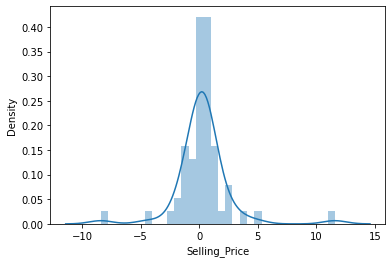

In [25]:
import seaborn as sns
sns.distplot(preds-Y_test)

In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),X,Y,cv=cv)

array([0.9560951 , 0.91205145, 0.966112  , 0.87787623, 0.95308552])